# Imports

In [1]:
import sys
sys.path.append("../")

# Standard Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Transformers
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import data
df = pd.read_csv('../data/training.csv')
# Reform column names
df.columns = [x.strip().replace(' ', '_').replace('-', '_') for x in df.columns]

df.head(2)

,Unnamed:_0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Some basic cleaning

As is common with csv files, pandas is reading in the ```index``` of the dataset as a column called ```Unnamed_0```. 

Let's drop this column because it has no relationship without target variable.

In [3]:
df = df.iloc[:,1:]
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# EDA

## Preliminary

Let's check the shape of these data.

In [4]:
df.shape

(29305, 15)

Let's also inspect the types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
age               29305 non-null int64
workclass         29305 non-null object
fnlwgt            29305 non-null int64
education         29305 non-null object
education_num     29305 non-null int64
marital_status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital_gain      29305 non-null int64
capital_loss      29305 non-null int64
hours_per_week    29305 non-null int64
native_country    29305 non-null object
income            29305 non-null object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


The income column is our target, and will need to be changed to from a string to an integer. 

In [6]:
target_labeler = LabelEncoder()
df.income = target_labeler.fit_transform(df.income)

In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.575192,1.897528e+05,10.079884,1071.948712,87.569016,40.416789,0.241529
std,13.655374,1.053512e+05,2.573238,7381.438713,403.799399,12.356508,0.428017
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178650e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785060e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370440e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


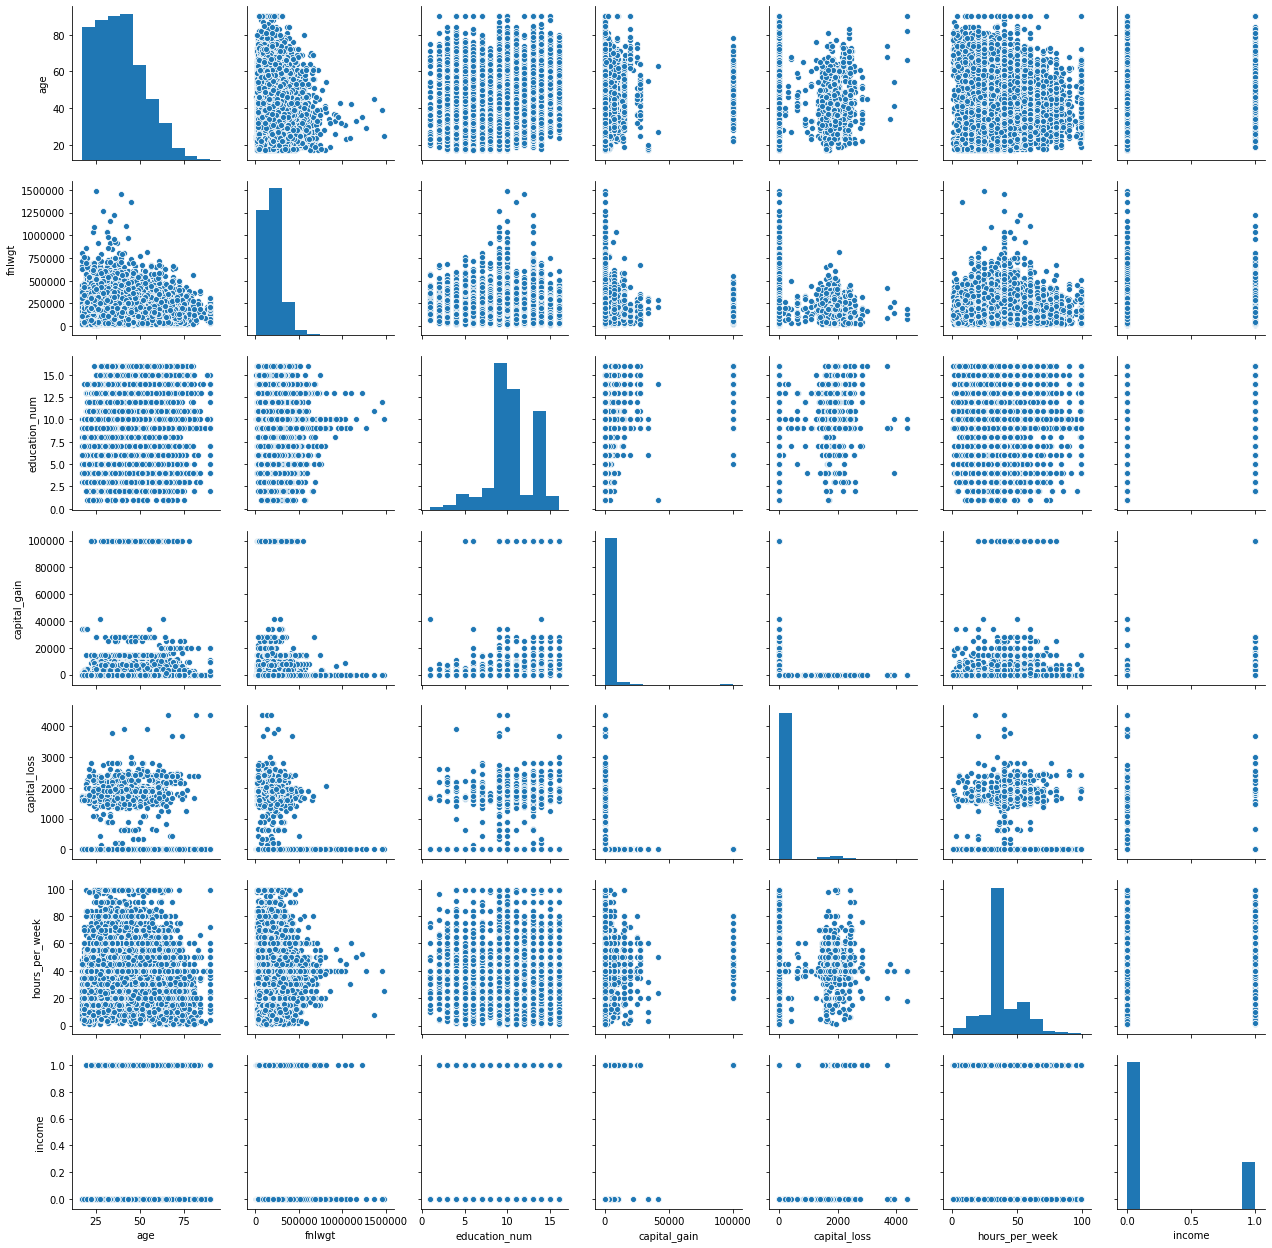

In [8]:
sns.pairplot(df);

## Investigate Age Column

In [9]:
# Print age info. 
df.age.describe()

count    29305.000000
mean        38.575192
std         13.655374
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

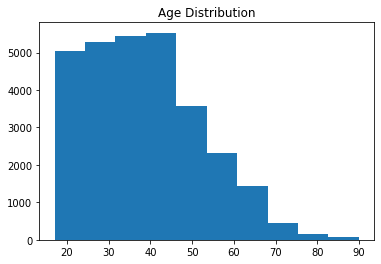

In [10]:
# Plot distribution of age column.

plt.title('Age Distribution')
df.age.hist()
plt.grid(False)
# ^ Your welcome, Ben

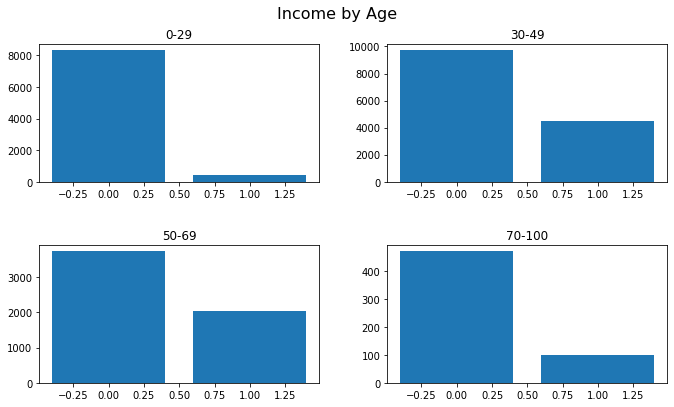

In [11]:
# Plot the income column binned according to age:

def row_column_mapper(rows, columns, index):
    '''function for identifying the row and column for
       subplots when looping over an array'''
    
    return index//rows, index%columns

bins = [(0, 29), (30, 49), (50, 69), (70, 100)]

row, columns = (2,2)
fig, ax = plt.subplots(2,2, figsize=(10,6))
for idx in range(len(bins)):
    lower = bins[idx][0]
    upper = bins[idx][1]
    
    series = df[(df.age >= lower) & (df.age<=upper)].income.value_counts()
    row, column = row_column_mapper(2,2,idx)
        
    ax[row, column].bar(series.index, series.values)
    ax[row, column].set_title(f'{lower}-{upper}')
fig.tight_layout(pad=3.0)  
fig.suptitle('Income by Age', fontsize=16);

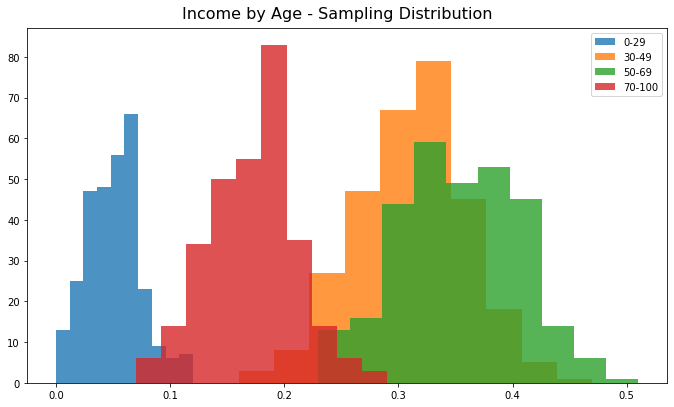

In [12]:
# Plot Sampling Distributions
fig, ax = plt.subplots(1, figsize=(10,6))
for idx in range(len(bins)):
    lower = bins[idx][0]
    upper = bins[idx][1]
    
    series = df[(df.age >= lower) & (df.age<=upper)].income
    sample_means = [np.random.choice(series, size = 100).mean() for x in range(300)]
    

        
    ax.hist(sample_means, label = f'{lower}-{upper}', alpha=.8)
fig.tight_layout(pad=3.0)  
fig.suptitle('Income by Age - Sampling Distribution', fontsize=16);
ax.legend();

**It may be worth binning our age data into three categories**
1. 0-29
2. 70-100
3. 30-69

**Still,** this graph does support the hypothesis that younger and older individuals earn less than those who are middle aged. 

Let's take a look at the split if I merge the ```0-29``` and ```70-100``` bins.

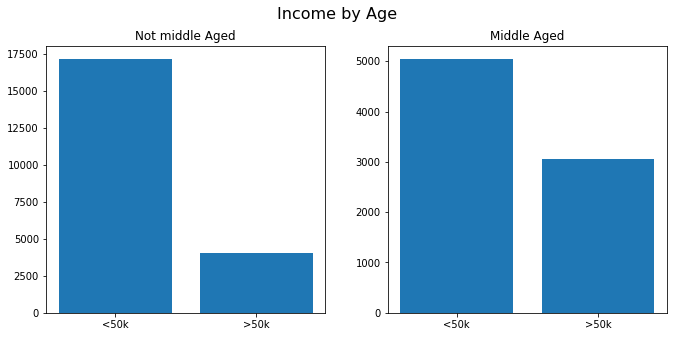

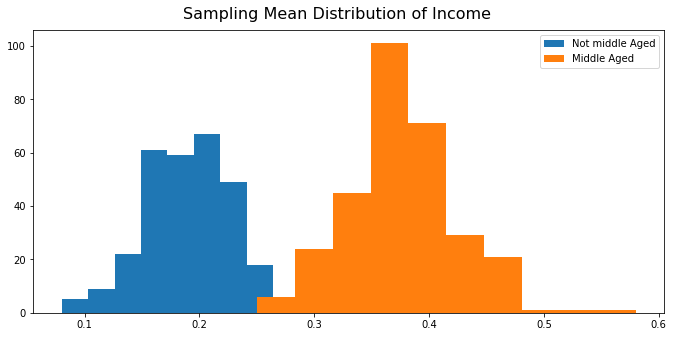

In [13]:
# Plot income binned according to middle age status. 

lower_and_younger = df[(df.age <45) | (df.age >=65)]
middle_aged = df[(df.age >= 45) & (df.age <=64)]

dataframes = [('Not middle Aged',lower_and_younger), ('Middle Aged',middle_aged)]

# Create a function to relabel our x labels 
income_label = lambda x: '>50k' if x == 1 else '<50k'

rows, columns = (1,2)
fig, ax = plt.subplots(rows, columns, figsize=(10,5))
for idx in range(len(dataframes)):
    series = dataframes[idx][1].income.value_counts()
    row, column = row_column_mapper(rows, columns, idx)
    labels = [income_label(x) for x in series.index]
    ax[column].bar(labels, series.values)
    ax[column].set_title(dataframes[idx][0])
    
fig.tight_layout(pad=3.0)  
fig.suptitle('Income by Age', fontsize=16);

fig, ax = plt.subplots(1, figsize=(10,5))
for name,frame in dataframes:
    series = frame.income
    sample_means = [np.random.choice(series, size = 100).mean() for x in range(300)]
    ax.hist(sample_means, label = name)
    ax.legend()
fig.tight_layout(pad=3.0)
fig.suptitle('Sampling Mean Distribution of Income', fontsize=16);

>It may be worth binning the age column into three seperate categories, 
but this seperation may also be satifactory. Let's stick with these binary categories for now. 
>>It would probably be a good idea to test both approaches while modeling!

### Bin Age Column

In [14]:
def bin_middle_age(age):
    if age < 45:
        return 0 
    elif age > 64:
        return 0
    else: 
        return 1
    
eda = df.copy()
eda['middle_age'] = df.age.apply(bin_middle_age)

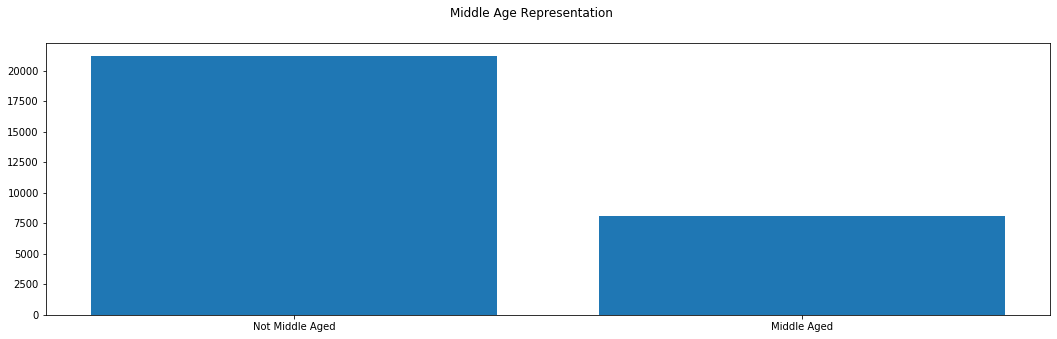

In [15]:
# Visualize balance of age column. 

# Isolate our data
series = eda.middle_age
series = series.value_counts()

# Instantiate fig, ax
fig, ax = plt.subplots(figsize = (18,5))
# Set title
fig.suptitle('Middle Age Representation');

# Create a function to relabel our x labels
age_label = lambda x: 'Middle Aged' if x == 1 else 'Not Middle Aged' 

# Apply our function using list comprehension
labels = [age_label(x) for x in series.index]

# Plot data
ax.bar(labels, series.values);

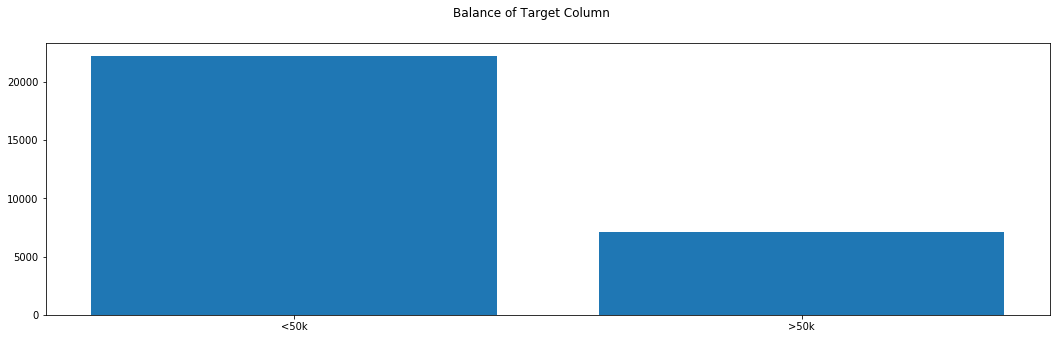

In [16]:
# Isolate our data
series = eda.income
series = series.value_counts()

# Instantiate fig, ax
fig, ax = plt.subplots(figsize = (18,5))
# Set title
fig.suptitle('Balance of Target Column');

# Apply our function using list comprehension
labels = [income_label(x) for x in series.index]

# Plot data
ax.bar(labels, series.values);

Woof, our target column is very unbalanced. It may be a good idea to consider resampling out data.

## Investigate Capital Gains/Losses

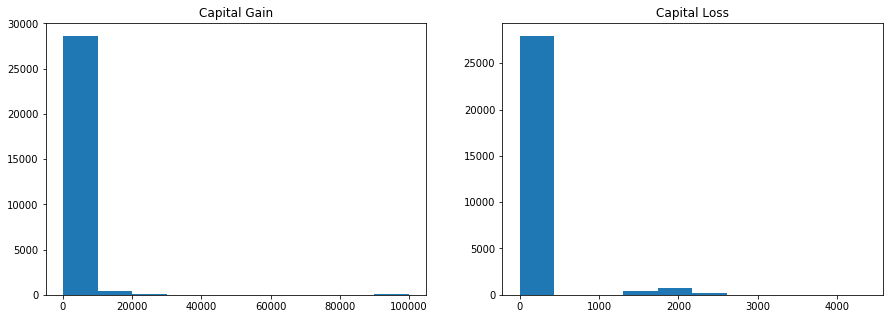

In [28]:
series = [('Capital Gain', df.capital_gain), ('Capital Loss',df.capital_loss)]

fig, ax = plt.subplots(1,2, figsize=(15,5))

for idx in range(len(series)):
    ax[idx].hist(series[idx][1])
    ax[idx].set_title(series[idx][0])

It looks like only a few respondants reported capital gains or losses.

Let's check the income distrubtion for those with and without capital gains/losses.

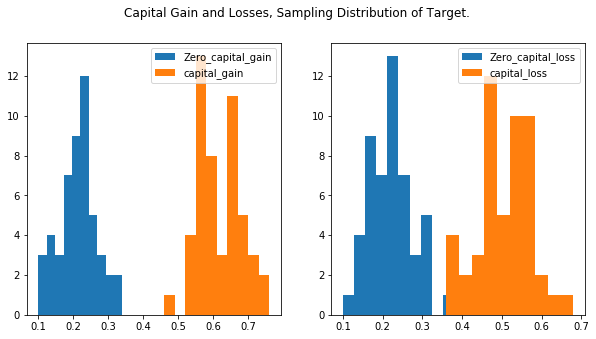

In [31]:
columns = ['capital_gain', 'capital_loss']

fig, ax = plt.subplots(1,2, figsize = (10, 5))

for idx in range(len(columns)):
    zero = df[df[columns[idx]] == 0].income
    positive = df[df[columns[idx]] > 0].income
    
    zero_sample = [np.random.choice(zero, 50).mean() for x in range(50)]
    positive_sample = [np.random.choice(positive, 50).mean() for x in range(50)]
    
    ax[idx].hist(zero_sample, label = 'Zero_' + columns[idx])
    ax[idx].hist(positive_sample, label = columns[idx])
    ax[idx].legend()
fig.suptitle('Capital Gain and Losses, Sampling Distribution of Target.');

Observations with a Capital Gain or Loss greater than 0 makes up a very small percentage of these data, and there seem to be multiple buckets with drastically different magnitudes. The target seems separable with binary categorization and the different scales risk adding unecessary noise to our models.